In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import LabelEncoder
test=pd.read_csv("test_Insurance.csv")
train=pd.read_csv("train_Insurance.csv")


# Transformation De Donnees

## Duplicates 

<div style="border:2px solid #d9534f; padding:12px; border-radius:6px; background:#f9e6e6;">
<strong style="color:#d9534f;">ATTENTION : — Major data quality issue detected ⚠️</strong>
</div>

In [9]:
test.drop(labels=['Customer Id'], axis=1, inplace=True)
list(test)

['YearOfObservation',
 'Insured_Period',
 'Residential',
 'Building_Painted',
 'Building_Fenced',
 'Garden',
 'Settlement',
 'Building Dimension',
 'Building_Type',
 'NumberOfWindows',
 'Geo_Code',
 'Claim']

#### Years of Onservation

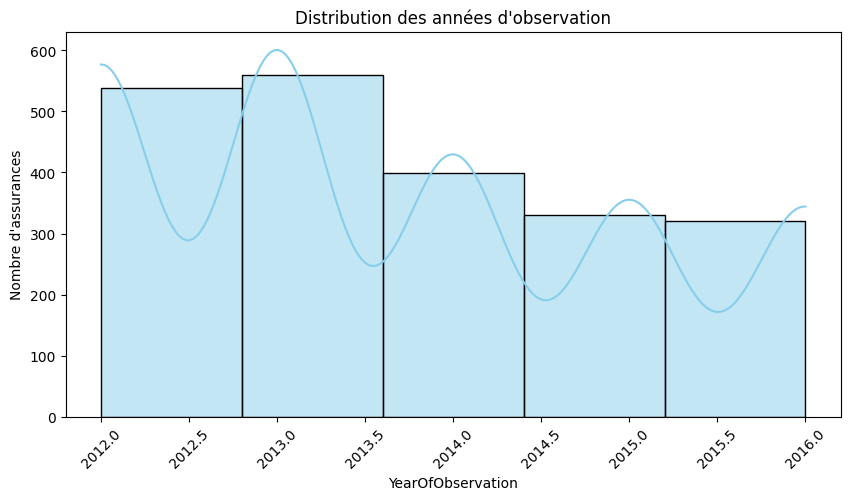

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(test["YearOfObservation"], bins=test["YearOfObservation"].nunique(), color="skyblue", kde=True)
plt.title("Distribution des années d'observation")
plt.xlabel("YearOfObservation")
plt.ylabel("Nombre d'assurances")
plt.xticks(rotation=45)
plt.show()


#### Insured_Period

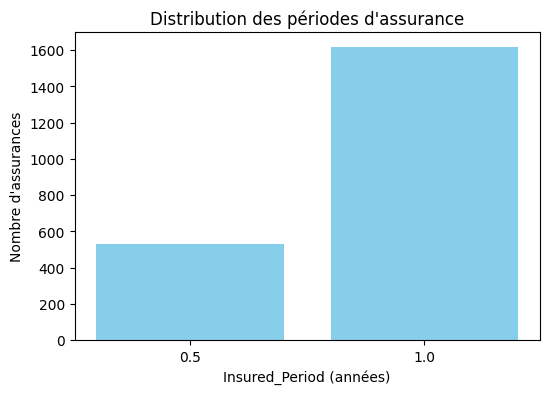

In [11]:
import matplotlib.pyplot as plt

period_counts = test["Insured_Period"].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(period_counts.index.astype(str), period_counts.values, color="skyblue")
plt.title("Distribution des périodes d'assurance")
plt.xlabel("Insured_Period (années)")
plt.ylabel("Nombre d'assurances")
plt.show()
# Data Imbalance Detected

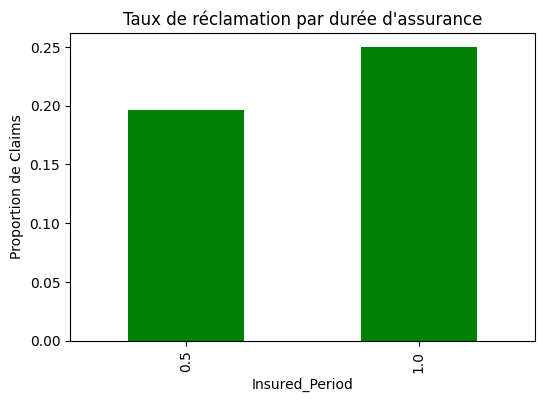

In [12]:
claim_rate = test.groupby("Insured_Period")["Claim"].apply(lambda x: (x=="oui").mean())

plt.figure(figsize=(6,4))
claim_rate.plot(kind="bar", color="green")
plt.title("Taux de réclamation par durée d'assurance")
plt.ylabel("Proportion de Claims")
plt.xlabel("Insured_Period")
plt.show()
# no need the alter the data as the proportions are close

#### Residential 

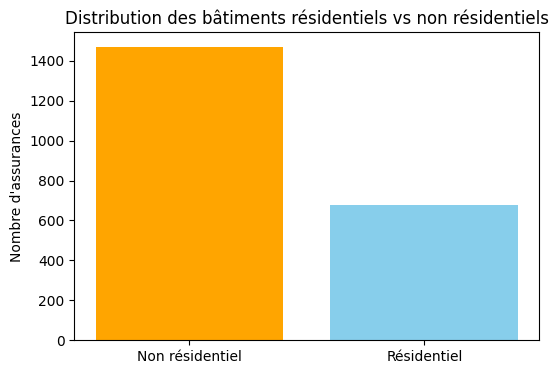

In [13]:
import matplotlib.pyplot as plt

counts = test["Residential"].value_counts()
labels = ["Non résidentiel", "Résidentiel"]

plt.figure(figsize=(6,4))
plt.bar(labels, counts.values, color=["orange","skyblue"])
plt.title("Distribution des bâtiments résidentiels vs non résidentiels")
plt.ylabel("Nombre d'assurances")
plt.show()
# data imbalance

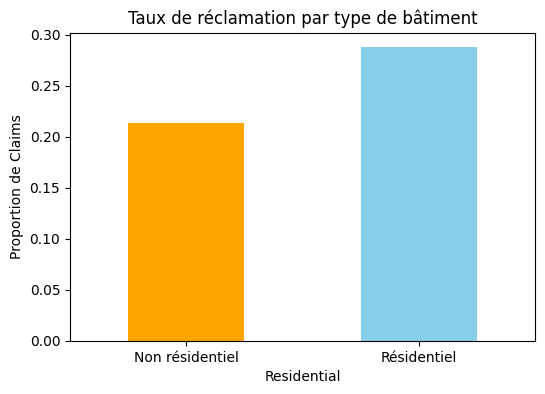

In [14]:
claim_rate = test.groupby("Residential")["Claim"].apply(lambda x: (x=="oui").mean())

plt.figure(figsize=(6,4))
claim_rate.plot(kind="bar", color=["orange","skyblue"])
plt.title("Taux de réclamation par type de bâtiment")
plt.ylabel("Proportion de Claims")
plt.xticks([0,1], ["Non résidentiel", "Résidentiel"], rotation=0)
plt.show()


#### Building_Painted 

In [15]:
test["Building_Painted"].value_counts()

Building_Painted
V    1619
N     528
Name: count, dtype: int64

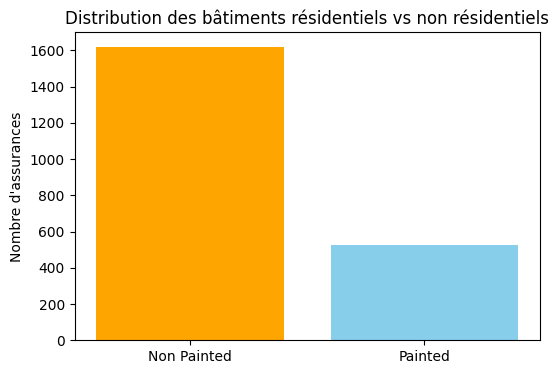

In [16]:
import matplotlib.pyplot as plt

counts = test["Building_Painted"].value_counts()
labels = ["Non Painted", "Painted"]

plt.figure(figsize=(6,4))
plt.bar(labels, counts.values, color=["orange","skyblue"])
plt.title("Distribution des bâtiments résidentiels vs non résidentiels")
plt.ylabel("Nombre d'assurances")
plt.show()
# data imbalance

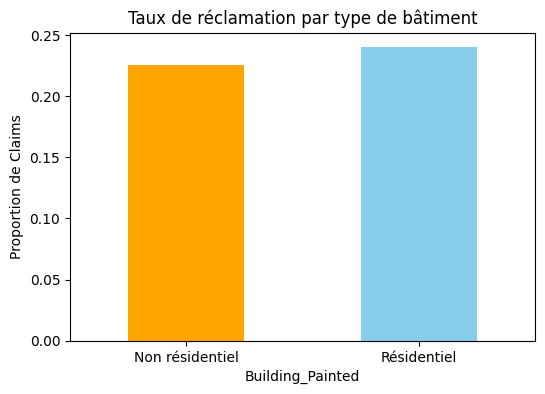

In [17]:
claim_rate = test.groupby("Building_Painted")["Claim"].apply(lambda x: (x=="oui").mean())

plt.figure(figsize=(6,4))
claim_rate.plot(kind="bar", color=["orange","skyblue"])
plt.title("Taux de réclamation par type de bâtiment")
plt.ylabel("Proportion de Claims")
plt.xticks([0,1], ["Non résidentiel", "Résidentiel"], rotation=0)
plt.show()


#### Building_Fenced

In [18]:
test["Building_Fenced"].value_counts() # no need for further manipulation

Building_Fenced
V    1074
N    1073
Name: count, dtype: int64

#### Garden

In [19]:
test["Garden"].isna().sum() # 4 NaN values 

np.int64(3)

In [20]:
mf_imputer = SimpleImputer(missing_values=np.nan, 
strategy="most_frequent")
test[["Garden"]]=mf_imputer.fit_transform(test.loc[:,['Garden']]) 

#### Settlement

In [21]:
print(test["Settlement"].value_counts())
print("valeurs manquantes :",test["Settlement"].isna().sum()) # no NaN values


Settlement
U    1074
R    1073
Name: count, dtype: int64
valeurs manquantes : 0


#### Building Dimension

In [22]:
median_imputer = SimpleImputer(strategy="median")
test[["Building Dimension"]] = median_imputer.fit_transform(test[["Building Dimension"]])

####  Geo_Code

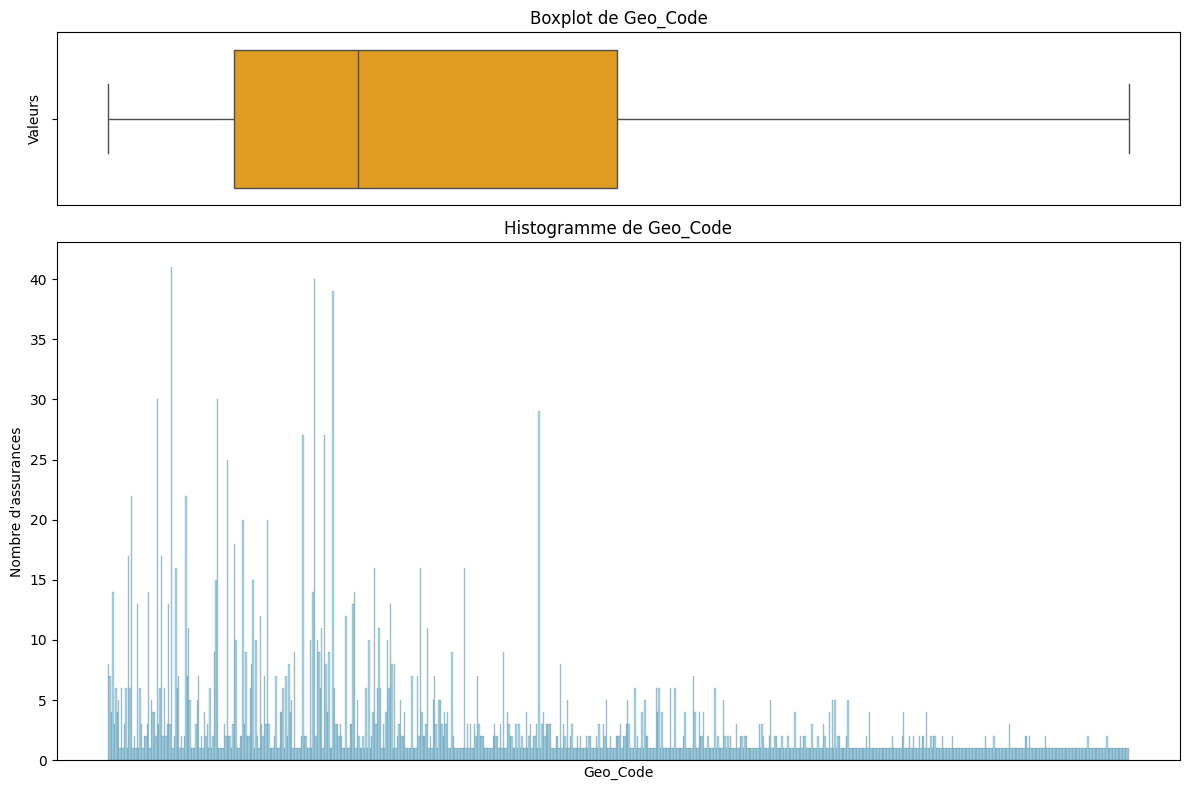

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 3]})

# Boxplot sur le premier axe
sns.boxplot(x=test["Geo_Code"], ax=axes[0], color="orange")
axes[0].set_title("Boxplot de Geo_Code")
axes[0].set_xlabel("")
axes[0].set_ylabel("Valeurs")
axes[0].set_xticks([])  # supprimer les valeurs de l'axe x

# Histogramme sur le deuxième axe
sns.histplot(test["Geo_Code"], bins=30, color="skyblue", ax=axes[1])
axes[1].set_title("Histogramme de Geo_Code")
axes[1].set_xlabel("Geo_Code")
axes[1].set_ylabel("Nombre d'assurances")
axes[1].set_xticks([])  # supprimer les valeurs de l'axe x

plt.tight_layout()
plt.show()


In [24]:
# Calculer la valeur la plus fréquente (mode) de Geo_Code par Settlement + Residential
mode_geo = (
    test[test["Geo_Code"].notna()]
    .groupby(["Settlement", "Residential"])["Geo_Code"]
    .agg(lambda x: x.mode()[0])   # prend le mode (la valeur la plus fréquente)
    .reset_index()
    .rename(columns={"Geo_Code": "Geo_Code_mode"})
)

# Fusionner avec le dataframe original pour récupérer la valeur à imputer
test = test.merge(mode_geo, on=["Settlement", "Residential"], how="left")

# Remplacer les NaN par la valeur la plus fréquente du groupe
test["Geo_Code"] = test["Geo_Code"].fillna(test["Geo_Code_mode"])

# Supprimer la colonne temporaire
test = test.drop(columns=["Geo_Code_mode"])


In [25]:
test["Geo_Code"].value_counts()

Geo_Code
6088     53
21231    44
33063    40
13206    39
83137    30
         ..
38408     1
65440     1
92072     1
59367     1
42304     1
Name: count, Length: 714, dtype: int64

In [26]:
mask_numeric_only = test["Geo_Code"].str.isnumeric()
mask_alpha = test["Geo_Code"].str.contains(r'[A-Za-z]')
# Sélectionner ces lignes
geo_numeric_only = test[mask_numeric_only]
geo_rest_only = test[mask_alpha]
print("nbre de valeur numerique",geo_numeric_only["Geo_Code"].value_counts().sum())
print("nbre de valeur alphanumertique",geo_rest_only["Geo_Code"].value_counts().sum())
test = test[mask_numeric_only].copy()  # suppresion des lignes conitanant des valeurs alpha numeriques dans l'attribut Geo_Code
test["Geo_Code"] = test["Geo_Code"].astype(int)


nbre de valeur numerique 2117
nbre de valeur alphanumertique 30


In [27]:
test["Geo_Code"].value_counts()
# only 8 Geo codes and the rest is collapsed in Other

Geo_Code
6088     53
21231    44
33063    40
13206    39
83137    30
         ..
76235     1
38075     1
4126      1
92036     1
69027     1
Name: count, Length: 708, dtype: int64

#### Building_Type

In [28]:
test["Building_Type"].value_counts() # no modifcations needed 

Building_Type
Non-combustible    995
Fire-resistive     511
Ordinary           345
Wood-framed        266
Name: count, dtype: int64

In [29]:
test["Building_Type"].isna().sum()

np.int64(0)

In [30]:
test.isna().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

#### NumberOfWindows a revisiter

In [31]:
test["NumberOfWindows"].value_counts()

NumberOfWindows
without    1068
4           266
3           242
5           197
2           117
6            77
7            67
8            32
1            25
9            13
>=10         13
Name: count, dtype: int64

## tronsformation de donner


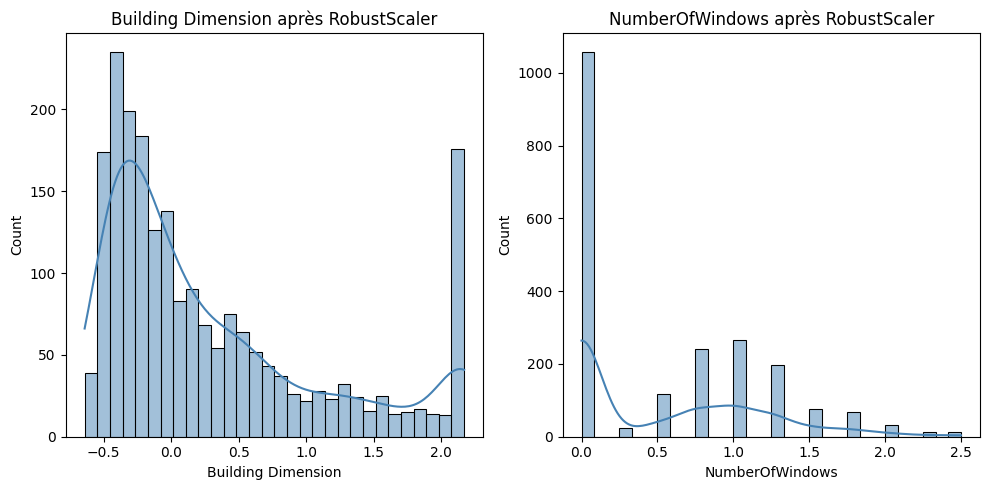

In [36]:
from sklearn.preprocessing import RobustScaler

# --- Colonnes à transformer ---
cols_to_scale = ['Building Dimension', 'NumberOfWindows']

# --- Initialisation du scaler robuste ---
scaler = RobustScaler()

# --- Transformation ---

test[cols_to_scale] = scaler.fit_transform(test[cols_to_scale])


n_cols = 2
n_rows = math.ceil(len(cols_to_scale) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_to_scale):
    sns.histplot(test[col], kde=True, ax=axes[i], color='steelblue', bins=30)
    axes[i].set_title(f"{col} après RobustScaler")

plt.tight_layout()
plt.show()



In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2106 entries, 0 to 2116
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   2106 non-null   int64  
 1   Insured_Period      2106 non-null   float64
 2   Residential         2106 non-null   int64  
 3   Building_Painted    2106 non-null   object 
 4   Building_Fenced     2106 non-null   object 
 5   Garden              2106 non-null   object 
 6   Settlement          2106 non-null   object 
 7   Building Dimension  2106 non-null   float64
 8   Building_Type       2106 non-null   object 
 9   NumberOfWindows     2106 non-null   float64
 10  Geo_Code            2106 non-null   int64  
 11  Claim               2106 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 213.9+ KB


In [38]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# --- Copie du DataFrame ---
test_transformed = test.copy()

# --- Étape 1 : encodage binaire manuel 
#Ces variables (Building_Painted, Building_Fenced, Garden) sont binaires (deux valeurs possibles
#Ici, il est inutile d’utiliser OneHotEncoder ou LabelEncoder, car on ne veut qu’un seul indicateur numérique.
test_transformed["Building_Painted"] = test_transformed["Building_Painted"].replace({'N': 1, 'V': 0})
test_transformed["Building_Fenced"] = test_transformed["Building_Fenced"].replace({'N': 1, 'V': 0})
test_transformed["Garden"] = test_transformed["Garden"].replace({'V': 1, 'O': 0})

# --- Étape 2 : One-Hot Encoding ---
#Ces colonnes (Settlement, Building_Type) sont catégorielles non ordonnées.
test_transformed = pd.get_dummies(test_transformed, columns=["Settlement", "Building_Type"], drop_first=True,dtype='int32')

# --- Étape 3 : Label Encoding sur la cible ---
# La variable cible "Claim" est catégorielle binaire ("Yes"/"No"),
# donc on la convertit en 0/1 via LabelEncoder.
le = LabelEncoder()
test_transformed["Claim"] = le.fit_transform(test_transformed["Claim"])
cols = [c for c in test_transformed.columns if c != "Claim"] + ["Claim"]
test_transformed = test_transformed[cols]


# --- Vérification ---
test_transformed.info()
test=test_transformed

<class 'pandas.core.frame.DataFrame'>
Index: 2106 entries, 0 to 2116
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   YearOfObservation              2106 non-null   int64  
 1   Insured_Period                 2106 non-null   float64
 2   Residential                    2106 non-null   int64  
 3   Building_Painted               2106 non-null   int64  
 4   Building_Fenced                2106 non-null   int64  
 5   Garden                         2106 non-null   int64  
 6   Building Dimension             2106 non-null   float64
 7   NumberOfWindows                2106 non-null   float64
 8   Geo_Code                       2106 non-null   int64  
 9   Settlement_U                   2106 non-null   int32  
 10  Building_Type_Non-combustible  2106 non-null   int32  
 11  Building_Type_Ordinary         2106 non-null   int32  
 12  Building_Type_Wood-framed      2106 non-null   int32 

C:\Users\3amme\AppData\Local\Temp\ipykernel_20068\3266184323.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_transformed["Building_Painted"] = test_transformed["Building_Painted"].replace({'N': 1, 'V': 0})
C:\Users\3amme\AppData\Local\Temp\ipykernel_20068\3266184323.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_transformed["Building_Fenced"] = test_transformed["Building_Fenced"].replace({'N': 1, 'V': 0})
C:\Users\3amme\AppData\Local\Temp\ipykernel_20068\3266184323.py:12: FutureWarning: Downcasting behavior in

## correlation

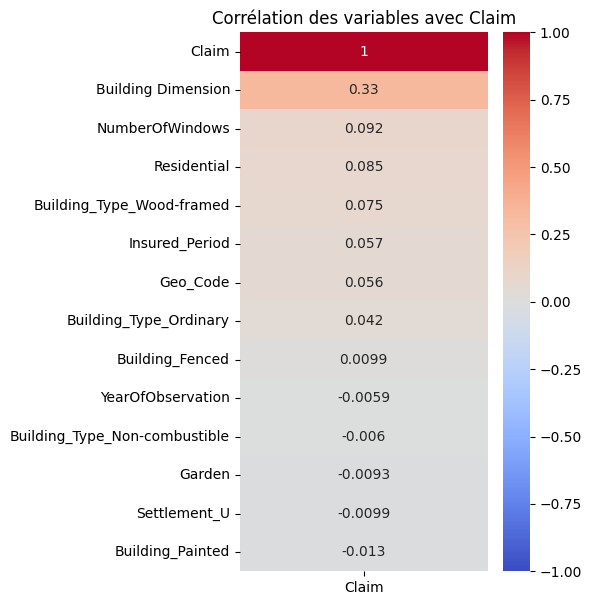

In [39]:
df_corr = test.corr(numeric_only=True)

# Extraire la corrélation avec la cible 'Claim'
corr_with_claim = df_corr[["Claim"]].sort_values(by="Claim", ascending=False)

# Affichage heatmap
plt.figure(figsize=(4, len(corr_with_claim)*0.5))  # taille dynamique selon nombre variables
sns.heatmap(corr_with_claim, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Corrélation des variables avec Claim')
plt.show()

In [ ]:
colonnes_supprimer = [
    'Building_Painted',
    'Geo_Code',
    'YearOfObservation',
    'Building_Type_Non-combustible'
]
test = test.drop(columns=colonnes_supprimer)
test = test.reset_index(drop=True)

<h1>le rest de features sont binaire donc on ne faire pas le scaler </h1>

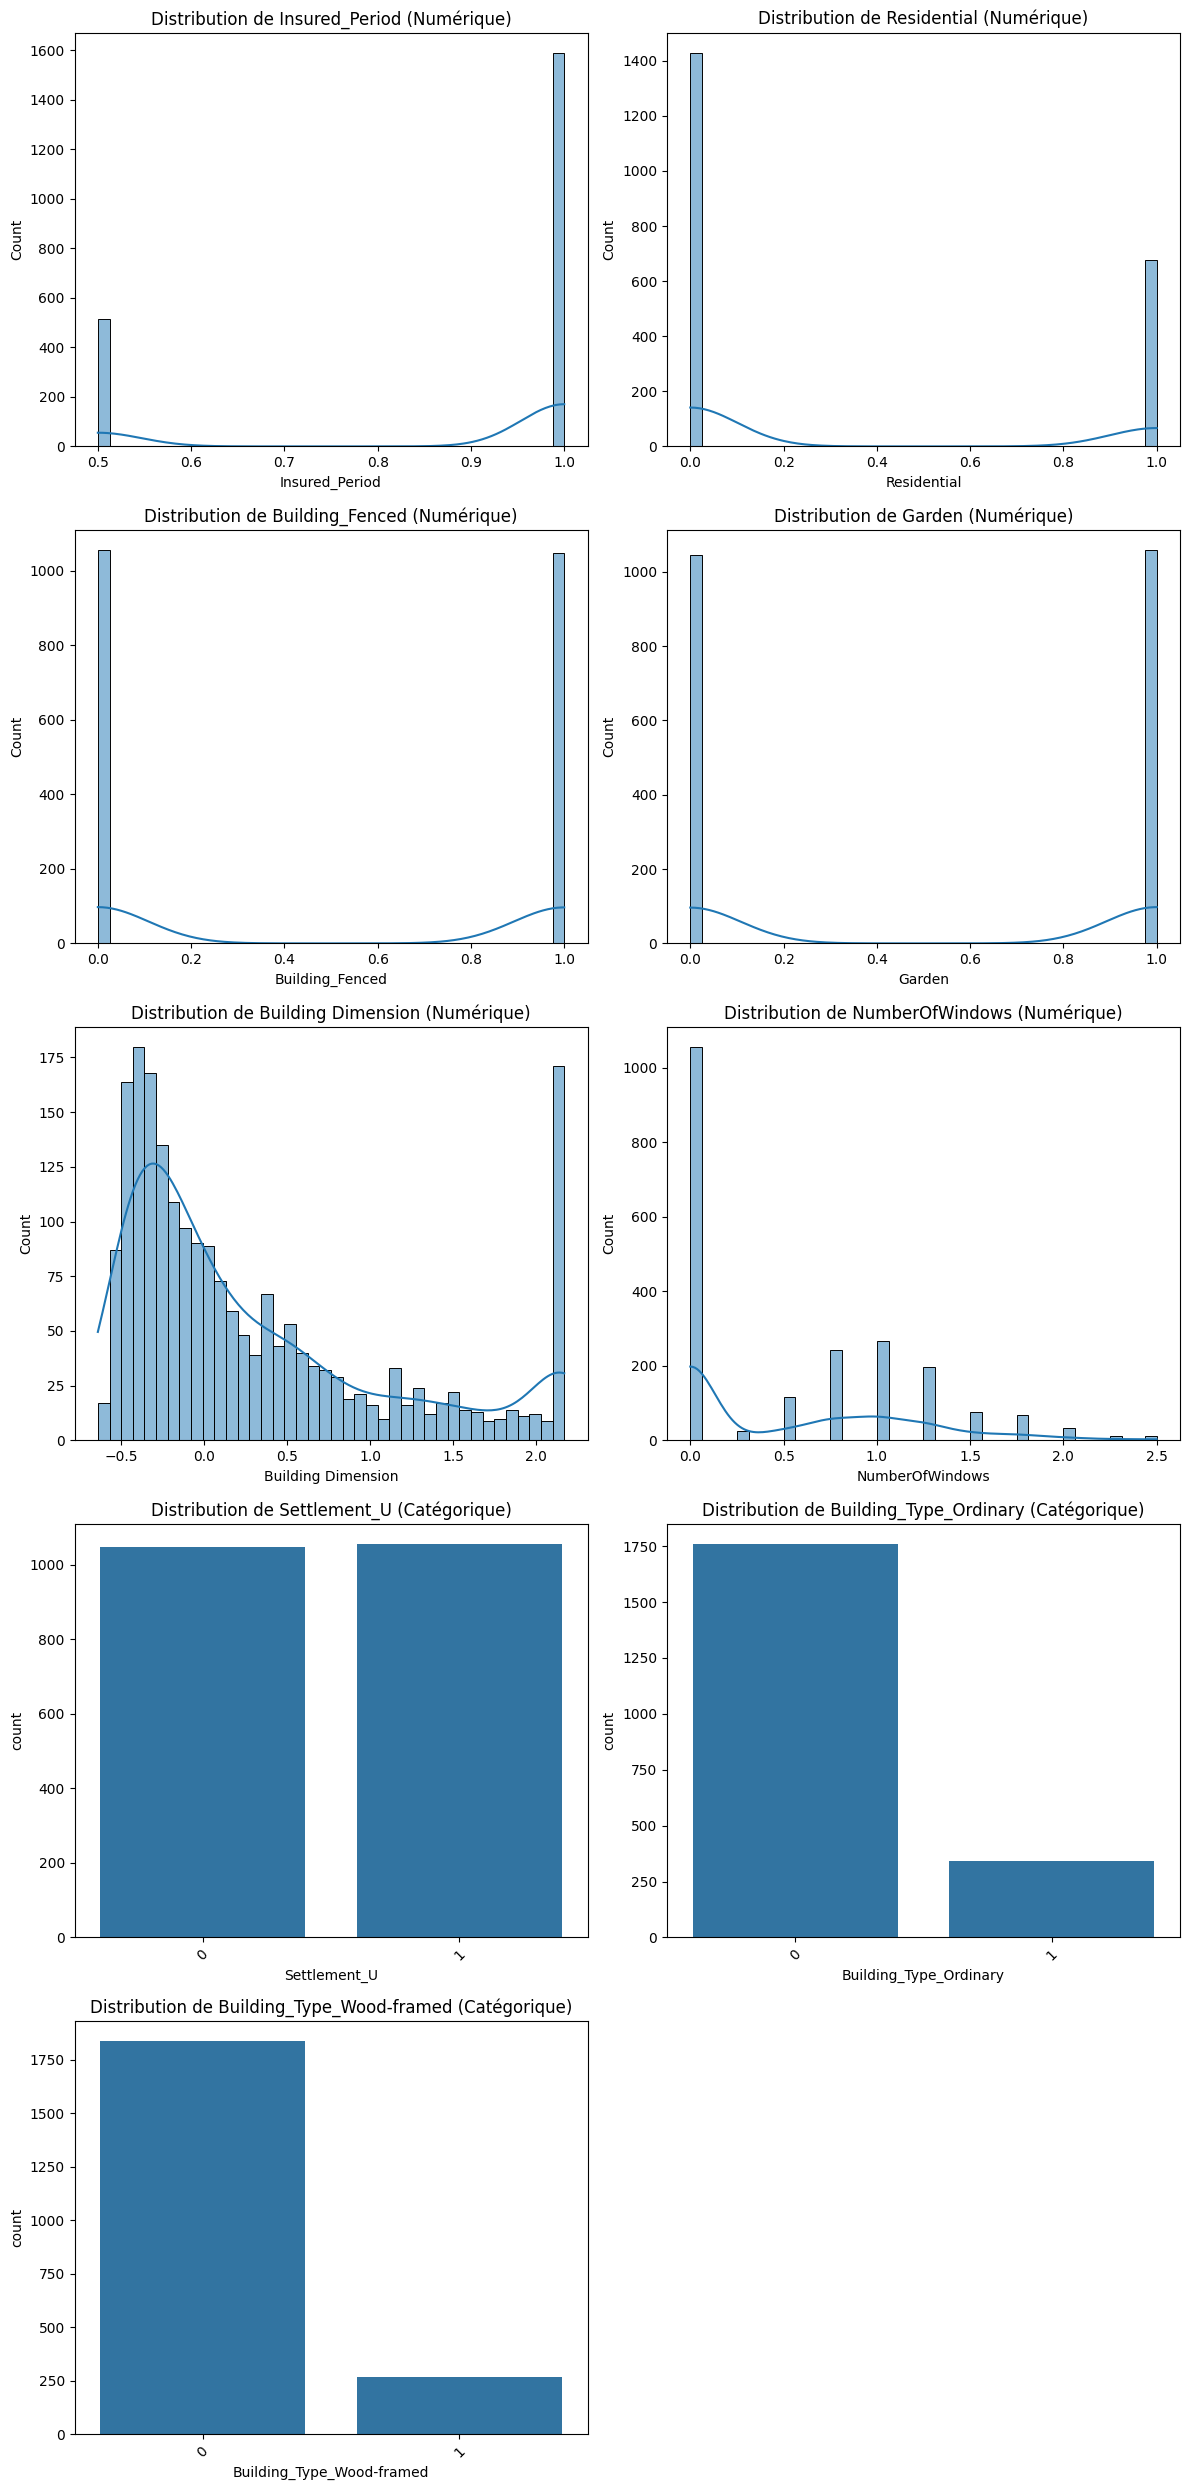

In [41]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Liste de toutes les colonnes sauf cible et ID
cols = [c for c in test.columns if c not in ['Claim']]

# Définir le nombre de colonnes par ligne dans la grille
n_cols = 2
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    if test[col].dtype in ['int64', 'float64', 'int', 'float']:
        # Colonnes numériques : histogramme + KDE
        sns.histplot(test[col].dropna(), kde=True, ax=ax, bins=40)
        ax.set_title(f"Distribution de {col} (Numérique)")
    else:
        # Colonnes catégoriques : barplot des fréquences
        sns.countplot(x=col, data=test, ax=ax)
        ax.set_title(f"Distribution de {col} (Catégorique)")
        for label in ax.get_xticklabels():
            label.set_rotation(45)  # rotation des labels pour lisibilité

    ax.set_xlabel(col)

# Supprimer les axes inutilisés (s'il y en a)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



## decalage de donner 


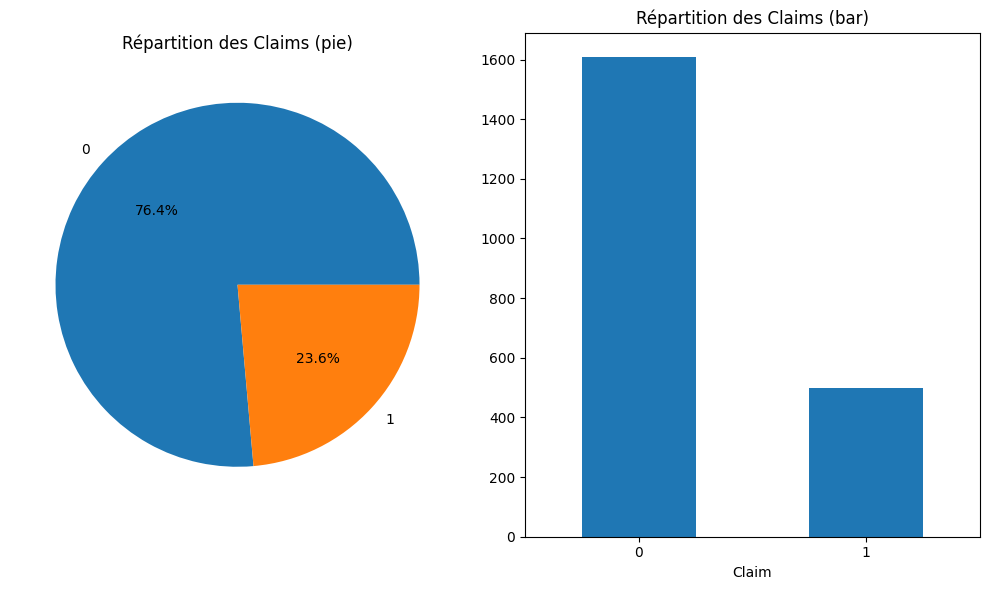

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
test['Claim'].value_counts().plot.pie(
    autopct='%1.1f%%',
    ax=axes[0],
    ylabel='',             
    title='Répartition des Claims (pie)'
)


test['Claim'].value_counts().plot.bar(
    ax=axes[1],
    rot=0,
    title='Répartition des Claims (bar)'
)

plt.tight_layout()
plt.show()